# Charging Station Behavior - 01
### ACN-Data Site: Caltech 
Dates: 1/01/2015 12:00 am - 1/01/2022  
Link : https://ev.caltech.edu/dataset
<hr>

Actions:
- review date-function
- 


Questions:
- what is the avg time to charge
- what is the avg disconnect time
- what is the adv time an individual leaves their car plugged in compared to the amount of time it takes to charge a vehicle

- how else can i segment the population 
- is there a pattern between the space ID and the avg kMh charged ( could  a cluster map be used here )
- how can i access the json nested in 'userinputs'


- start to create a master list of most valuable variable

<hr>

In [1]:
# Imports

import pandas as pd
#
from pandas.io.json import json_normalize
import json
#
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import seaborn as sns
import numpy as np

# set figure size 
sns.set(rc={'figure.figsize':(21,9)})

from dateutil import tz
from datetime import datetime

# nan
import missingno as msno

# Data Ingestion
<hr>

In [2]:
!ls ../data/ev_charging_datasets/caltech-20150101_20220101.json

../data/ev_charging_datasets/caltech-20150101_20220101.json


In [3]:
# open JSON file
data = json.load(open('../data/ev_charging_datasets/caltech-20150101_20220101.json'))

# Us only _items data
df = json_normalize(data, '_items')

In [4]:
df.shape

(31424, 13)

In [5]:
df.head(3)

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,0039,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,0002,CA-496,2-39-78-362,America/Los_Angeles,None,None
1,5bc90cb9f9af8b0d7fe77cd3,0039,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,0002,CA-319,2-39-95-27,America/Los_Angeles,None,None
2,5bc90cb9f9af8b0d7fe77cd4,0039,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,0002,CA-489,2-39-79-380,America/Los_Angeles,None,None


In [6]:
df.tail(3)

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
31421,61550519f9af8b76960e169c,0039,"Mon, 13 Sep 2021 22:33:07 GMT","Mon, 13 Sep 2021 23:06:55 GMT",None,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,0002,11900388,2-39-81-4550,America/Los_Angeles,000003905,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
31422,61550519f9af8b76960e169d,0039,"Mon, 13 Sep 2021 23:11:12 GMT","Tue, 14 Sep 2021 01:43:11 GMT","Tue, 14 Sep 2021 00:13:35 GMT",2.018,2_39_91_437_2021-09-13 23:10:59.528292,0002,CA-317,2-39-91-437,America/Los_Angeles,000001082,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."
31423,61550519f9af8b76960e169e,0039,"Tue, 14 Sep 2021 01:52:37 GMT","Tue, 14 Sep 2021 03:05:10 GMT",None,45.064,2_39_81_4550_2021-09-14 01:52:31.129163,0002,11900388,2-39-81-4550,America/Los_Angeles,000019055,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31424 entries, 0 to 31423
Data columns (total 13 columns):
_id                 31424 non-null object
clusterID           31424 non-null object
connectionTime      31424 non-null object
disconnectTime      31424 non-null object
doneChargingTime    29369 non-null object
kWhDelivered        31424 non-null float64
sessionID           31424 non-null object
siteID              31424 non-null object
spaceID             31424 non-null object
stationID           31424 non-null object
timezone            31424 non-null object
userID              16388 non-null object
userInputs          16388 non-null object
dtypes: float64(1), object(12)
memory usage: 3.1+ MB


In [1]:
df.columns

NameError: name 'df' is not defined

<hr>

#### Unique Values per Feature

In [ ]:
# See how many unique entries is in each numerical feature 
unique_values = df.select_dtypes(include= 'number').nunique().sort_values()

# Plot unique values with a y-axis in log-scale
unique_values.plot.bar(logy=True, figsize = (15,4), title='Unique values per Feature');


<br>

#### Check for Duplicates

In [ ]:
# Check number of duplicates
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features
columns_to_consider = df.columns

# Drop duplicates based on 'columns_to_consider'
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape


In [ ]:
# check duplicates
dif = set(df.index) - set(df_X.index) 
dif

<br>

#### Nan

In [ ]:
msno.matrix(df);

In [ ]:
msno.bar(df);

<br>

#### Numerical Features

In [ ]:
# 

df.plot(lw=0,
    marker='.',
    subplots=True,
    layout=(-1,4),
    figsize=(15,15),
    markersize=1);

<br>

#### Non-Numerical Features

In [ ]:
# number of non-numerical features
df.select_dtypes(exclude=["number", "datetime"]).shape

In [ ]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=22, figsize=(12, 45))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

<br>

#### Feature Distrobution

In [ ]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

<br>

#### Continous Features

In [ ]:
# continouous colums seen in 'Unique values per Feature graph'
cols_continuous = ['Fee','Plug In Event Id','Gasoline Savings (gallons)','GHG Savings (kg)', 'Energy (kWh)', 'User ID']

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous]
df_continuous.shape

In [9]:
df.head(1).T

,0
_id,5bc90cb9f9af8b0d7fe77cd2
clusterID,0039
connectionTime,"Wed, 25 Apr 2018 11:08:04 GMT"
disconnectTime,"Wed, 25 Apr 2018 13:20:10 GMT"
doneChargingTime,"Wed, 25 Apr 2018 13:21:10 GMT"
kWhDelivered,7.932
sessionID,2_39_78_362_2018-04-25 11:08:04.400812
siteID,0002
spaceID,CA-496
stationID,2-39-78-362


# Feature Creation
<hr>

In [10]:
# review date function 
quote date function from site

SyntaxError: invalid syntax (<ipython-input-10-29fe6f5ecbd3>, line 2)

In [ ]:
"""
   fuction from P.py on stackoverflow
   https://stackoverflow.com/questions/54562555/python-code-to-convert-wed-06-feb-2019-204746-gmt-to-2019-02-06-154746-est


"""

def date_convert(gmt_date):

    
    print("Date in GMT: {0}".format(gmt_date))
    # Hardcode from and to time zones
    from_zone = tz.gettz('GMT')
    to_zone = tz.gettz('US/Eastern')
    # gmt = datetime.gmtnow()
    gmt = datetime.strptime(gmt_date, '%a, %d %b %Y %H:%M:%S GMT')
    # Tell the datetime object that it's in GMT time zone
    gmt = gmt.replace(tzinfo=from_zone)
    # Convert time zone
    eastern_time = str(gmt.astimezone(to_zone))
    # Check if its EST or EDT        
    
    print(eastern_time)
    
    if eastern_time[-6:] == "-05:00":
        print ("Date in US/Eastern: " +eastern_time.replace("-05:00"," EST"))
    elif eastern_time[-6:] == "-04:00":
        print ("Date in US/Eastern: " +eastern_time.replace("-04:00"," EDT"))
        
return eastern_time

''

In [ ]:
 x = date_convert('Wed, 25 Apr 2018 13:45:10 GMT')

Date in GMT: Wed, 25 Apr 2018 13:45:10 GMT
2018-04-25 09:45:10-04:00
Date in US/Eastern: 2018-04-25 09:45:10 EDT


In [ ]:
df['connectionTime'] = pd.datetime(df['connectionTime'])   
df['disconnectTime'] = pd.datetime(df['disconnectTime'])
df['donechargingTime']  = pd.datetime(df['donechargingTime']) 

TypeError: cannot convert the series to <class 'int'>

# Exploration
<hr>

#### _id

In [ ]:
df['_id'].isna().value_counts()

False    31424
Name: _id, dtype: int64

In [ ]:
len(df['_id'].unique())

31424

#### clusterID

In [ ]:
df['clusterID'].isna().value_counts()

False    31424
Name: clusterID, dtype: int64

In [ ]:
df['clusterID'].unique()

array(['0039', 39], dtype=object)

#### connectionTime

In [ ]:
df['connectionTime'].isna().value_counts()

False    31424
Name: connectionTime, dtype: int64

#### disconnectTime	

In [ ]:
df['disconnectTime'].isna().value_counts()

False    31424
Name: disconnectTime, dtype: int64

#### doneChargingTime

In [ ]:
df['doneChargingTime'].isna().value_counts()

False    29369
True      2055
Name: doneChargingTime, dtype: int64

#### Time 

In [ ]:
df[['connectionTime','disconnectTime','doneChargingTime']].sample(6)

,connectionTime,disconnectTime,doneChargingTime
22969,"Mon, 09 Sep 2019 20:28:20 GMT","Tue, 10 Sep 2019 01:10:37 GMT","Mon, 09 Sep 2019 22:54:55 GMT"
13471,"Thu, 08 Nov 2018 16:24:06 GMT","Fri, 09 Nov 2018 02:34:54 GMT","Thu, 08 Nov 2018 23:39:48 GMT"
5382,"Tue, 24 Jul 2018 15:43:36 GMT","Wed, 25 Jul 2018 01:47:28 GMT","Tue, 24 Jul 2018 18:22:42 GMT"
19662,"Wed, 15 May 2019 15:49:12 GMT","Thu, 16 May 2019 00:35:49 GMT","Wed, 15 May 2019 17:15:38 GMT"
7698,"Fri, 24 Aug 2018 01:36:51 GMT","Fri, 24 Aug 2018 03:22:39 GMT","Fri, 24 Aug 2018 03:22:31 GMT"
8353,"Fri, 31 Aug 2018 23:24:58 GMT","Sat, 01 Sep 2018 00:45:13 GMT","Sat, 01 Sep 2018 00:43:38 GMT"


In [ ]:
# question 

"""
average time individual leave their car plugged in compared to the 
amount of time it takes to charge the vehicle 

""""

#### kWhDelivered

In [ ]:
df['kWhDelivered'].isna().value_counts()

False    31424
Name: kWhDelivered, dtype: int64

In [ ]:
df['kWhDelivered'].agg(['mean', 'std', 'min', 'max'])

mean     9.253283
std      8.760917
min      0.501000
max     77.700000
Name: kWhDelivered, dtype: float64

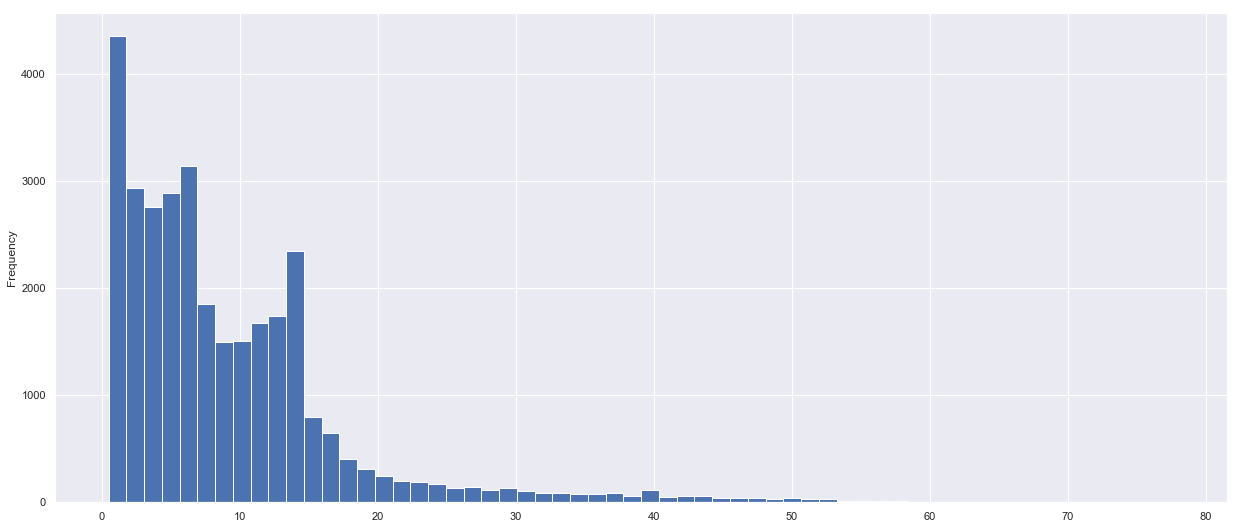

In [ ]:
df['kWhDelivered'].plot(kind = 'hist', bins = 60)

#### sessionID

In [ ]:
df['sessionID'].isna().value_counts()

False    31424
Name: sessionID, dtype: int64

In [ ]:
len(df['sessionID'].unique())

31424

#### siteID

In [ ]:
df['siteID'].isna().value_counts()

False    31424
Name: siteID, dtype: int64

In [ ]:
df['siteID'].value_counts()

0002    29343
2        2081
Name: siteID, dtype: int64

#### SpaceID

In [ ]:
df['spaceID'].isna().value_counts()

False    31424
Name: spaceID, dtype: int64

In [ ]:
len(df['spaceID'].unique())

55

In [ ]:
df['spaceID'].value_counts()

##### StationID

In [ ]:
df['stationID'].isna().value_counts()

False    31424
Name: stationID, dtype: int64

In [ ]:
print()
print('number of unique stationIDs: ',len(df['stationID'].unique()))
df['stationID'].unique()


number of unique stationIDs:  55


array(['2-39-78-362', '2-39-95-27', '2-39-79-380', '2-39-79-379',
       '2-39-79-381', '2-39-139-28', '2-39-91-441', '2-39-79-377',
       '2-39-79-382', '2-39-78-366', '2-39-91-437', '2-39-78-361',
       '2-39-78-360', '2-39-125-21', '2-39-78-365', '2-39-127-19',
       '2-39-79-383', '2-39-89-25', '2-39-95-444', '2-39-124-22',
       '2-39-89-439', '2-39-92-442', '2-39-123-23', '2-39-90-440',
       '2-39-78-364', '2-39-88-24', '2-39-90-26', '2-39-88-438',
       '2-39-78-363', '2-39-79-378', '2-39-123-557', '2-39-78-367',
       '2-39-79-376', '2-39-138-29', '2-39-128-18', '2-39-125-559',
       '2-39-126-20', '2-39-131-30', '2-39-130-31', '2-39-92-436',
       '2-39-138-566', '2-39-130-564', '2-39-129-17', '2-39-139-567',
       '2-39-127-561', '2-39-124-558', '2-39-129-563', '2-39-131-565',
       '2-39-83-386', '2-39-128-562', '2-39-126-560', '2-39-83-387',
       '2-39-82-384', '2-39-82-385', '2-39-81-4550'], dtype=object)

#### Timezone

In [ ]:
df['timezone'].isna().value_counts()

False    31424
Name: timezone, dtype: int64

In [ ]:
df['timezone'].unique()

array(['America/Los_Angeles'], dtype=object)

#### UserID

In [ ]:
# checking for Nans
df['userID'].isna().value_counts()

False    16388
True     15036
Name: userID, dtype: int64

In [ ]:
# number of unique users 

len(df['userID'].unique())

572

#### userinputs

In [ ]:
print()
print('rows in total: ', df.shape[0])
print()
df['userInputs'].isna().value_counts()


rows in total:  31424



False    16388
True     15036
Name: userInputs, dtype: int64

In [ ]:
df[ df['_id'] == '5bc915caf9af8b0dad3c0660']['userInputs']

222    [{'WhPerMile': 350, 'kWhRequested': 59.5, 'mil...
Name: userInputs, dtype: object

In [ ]:
# this the value of userInputs when value is not Nan

{
     "userInputs": [
        {
          "WhPerMile": 350,
          "kWhRequested": 59.5,
          "milesRequested": 170,
          "minutesAvailable": 550,
          "modifiedAt": "Mon, 30 Apr 2018 15:08:54 GMT",
          "paymentRequired": True,
          "requestedDeparture": "Tue, 01 May 2018 00:17:49 GMT",
          "userID": 22
        }
      ]
}

{'userInputs': [{'WhPerMile': 350,
   'kWhRequested': 59.5,
   'milesRequested': 170,
   'minutesAvailable': 550,
   'modifiedAt': 'Mon, 30 Apr 2018 15:08:54 GMT',
   'paymentRequired': True,
   'requestedDeparture': 'Tue, 01 May 2018 00:17:49 GMT',
   'userID': 22}]}

<hr>

In [ ]:
## Questions
""""
   time spent charging and count of charges

"""

In [ ]:
df.groupby('spaceID')['kWhDelivered'].agg(
                            ['mean', 'count','std', 'min', 'max',]).sort_values(by = 'mean', ascending= False)

,mean,count,std,min,max
spaceID,,,,,
11900388,22.170396,1130,13.951547,0.552000,77.700000
CA-498,13.943494,509,12.515470,0.575000,57.887000
CA-499,11.360910,458,8.834282,0.640000,59.796000
CA-497,11.313693,400,9.187910,0.526000,50.807000
CA-325,10.787713,828,9.182626,0.589000,61.114000
CA-490,10.686224,593,9.940568,0.629000,61.550000
CA-323,10.074022,766,9.945773,0.502000,56.779000
CA-317,10.054571,856,9.516660,0.528000,75.528000
CA-492,9.944479,688,7.719179,0.531000,58.010000
